In [39]:
# 웹 사이트 크롤링

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=[]
columns=['시점','최저임금','인상률']
driver = webdriver.Chrome()
url='https://www.minimumwage.go.kr/minWage/policy/decisionMain.do' # 값을 크롤링할 브라우저
driver.get(url)
time.sleep(3)


for i in range(2,10): # 17년부터 24년까지의 데이터를 불러옴
    date=driver.find_element(By.XPATH,'//*[@id="container"]/div/div[2]/div[3]/div/table/tbody/tr['+str(i)+']/td[1]').text
    min_wage=driver.find_element(By.XPATH,'//*[@id="container"]/div/div[2]/div[3]/div/table/tbody/tr['+str(i)+']/td[2]').text
    increase_rate=driver.find_element(By.XPATH,' //*[@id="container"]/div/div[2]/div[3]/div/table/tbody/tr['+str(i)+']/td[5]').text
    data.append([date+'.1', min_wage,(increase_rate)]) # 분기 표시를 위해 날짜에 '.1' 삽입
    data.append([date+'.2', min_wage,(increase_rate)])


df = pd.DataFrame(data, columns=columns) # 데이터 프레임으로 변환
df['시점']='20'+(df['시점'].str[1:3])+(df['시점'].str[20:22]) # 날짜 처리
df['인상률']=df['인상률'].str.split(' ').str[0] # 인상률 처리
df = df.sort_values(by='시점', ascending=True).reset_index(drop=True) # 시점 데이터 오름차순 정렬
df['최저임금']=df['최저임금'].str.replace(',', '') # 최저임금의 화폐단위 표시 제거
df.to_csv('data/최저임금_데이터.csv', encoding='cp949',index=False) # csv파일 저장

In [49]:
min_wage=pd.read_csv('data/최저임금_데이터.csv',encoding='cp949')
min_wage

시점  최저임금    인상률
0   2017.1  6470   7.30
1   2017.2  6470   7.30
2   2018.1  7530  16.40
3   2018.2  7530  16.40
4   2019.1  8350  10.90
5   2019.2  8350  10.90
6   2020.1  8590   2.87
7   2020.2  8590   2.87
8   2021.1  8720   1.50
9   2021.2  8720   1.50
10  2022.1  9160   5.05
11  2022.2  9160   5.05
12  2023.1  9620   5.00
13  2023.2  9620   5.00
14  2024.1  9860   2.50
15  2024.2  9860   2.50

In [51]:
employee_rate=pd.read_csv('data/시도별_고용률.csv',encoding='cp949')

In [53]:
employee_rate['시점']=employee_rate['시점'].str[0:4]+employee_rate['시점'].str[4:6] # 시점 데이터를 년도.분기 형식으로 변경
employee_rate.columns=['행정구역','시점','15세이상인구','경제활동인구','취업자','실업자','비경제활동인구','경제활동참가율','고용률','실업률'] 
# 고용률의 칼럼이름 변경
cols = ['15세이상인구', '경제활동인구', '취업자', '실업자', '비경제활동인구']
employee_rate[cols] = employee_rate[cols] * 1000 # 1000단위인걸 원래 숫자로 변경

In [57]:
employee_rate

행정구역      시점  15세이상인구   경제활동인구      취업자     실업자  비경제활동인구  경제활동참가율  \
0      서울특별시  2017.1  8562000  5405000  5132000  272000  3158000     63.1   
1      서울특별시  2017.2  8549000  5385000  5161000  224000  3163000     63.0   
2      서울특별시  2018.1  8533000  5363000  5098000  266000  3169000     62.9   
3      서울특별시  2018.2  8504000  5277000  5055000  222000  3227000     62.1   
4      서울특별시  2019.1  8481000  5329000  5052000  277000  3152000     62.8   
..       ...     ...      ...      ...      ...     ...      ...      ...   
267  제주특별자치도  2022.2   576000   423000   416000    7000   153000     73.5   
268  제주특별자치도  2023.1   579000   407000   398000    9000   172000     70.4   
269  제주특별자치도  2023.2   580000   413000   408000    5000   167000     71.2   
270  제주특별자치도  2024.1   578000   410000   400000   10000   168000     71.0   
271  제주특별자치도  2024.2   577000   406000   400000    7000   171000     70.4   

      고용률  실업률  
0    59.9  5.0  
1    60.4  4.2  
2    59.7  5.0  
3    59.4  4.2  
4    59.6  5.2  
..    ...  ...  
267  72.2  1.7  
268  68.8  2.3  
269  70.4  1.2  
270  69.2  2.5  
271  69.3  1.7  

[272 rows x 10 columns]

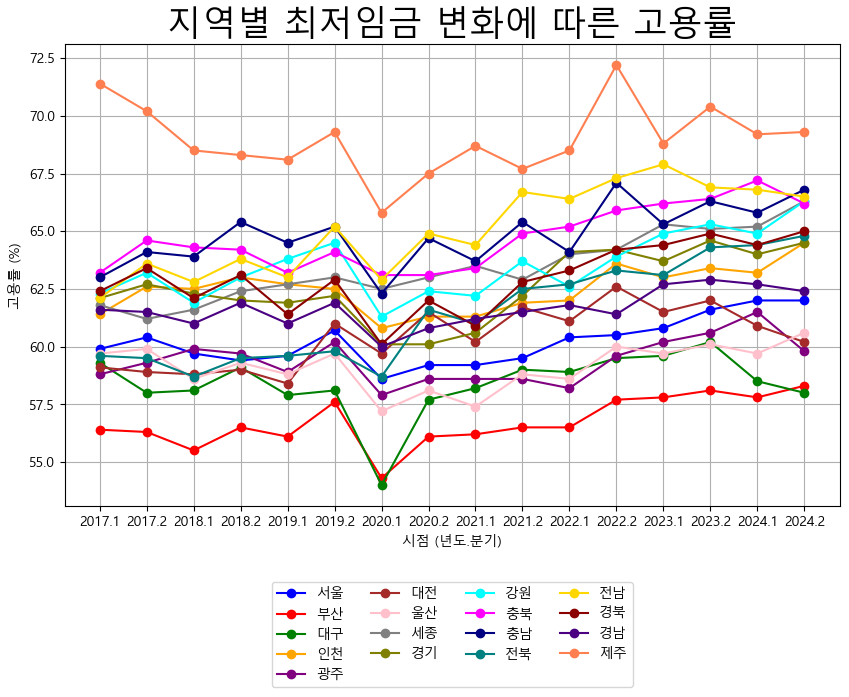

In [65]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

colors = [
    'blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive',
    'cyan', 'magenta', 'navy', 'teal', 'gold', 'darkred', 'indigo', 'coral'
] # 색상 리스트

labels = [
    '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종',
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'
] # 지역 리스트

plt.figure(figsize=(10,6)) # 크기 설정
plt.title('지역별 최저임금 변화에 따른 고용률', fontsize=25) # 제목 설정

for i in range(17): # 반복문을 통해 x축 y축 설정
    plt.plot(min_wage['시점'].astype(str),
             employee_rate.iloc[i*16:(i+1)*16, 8],
             marker='o',
             color=colors[i],
             label=labels[i])

plt.xlabel('시점 (년도.분기)', fontsize=10) # x축 주석
plt.ylabel('고용률 (%)', fontsize=10) # y축 주석
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) # 범례를 아래쪽에 표시
plt.grid(True)
plt.show()


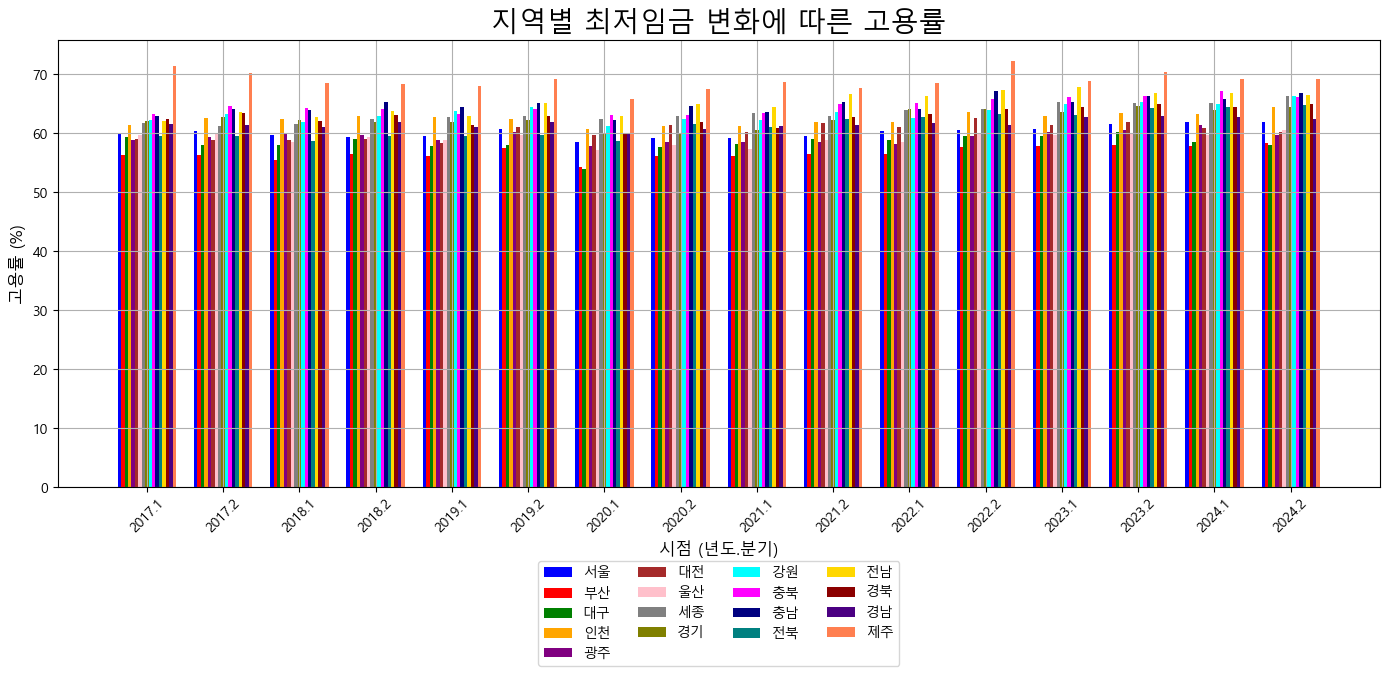

In [69]:
plt.rcParams['font.family'] = 'Malgun Gothic'

colors = [
    'blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive',
    'cyan', 'magenta', 'navy', 'teal', 'gold', 'darkred', 'indigo', 'coral'
] 

labels = [
    '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종',
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'
] 


time_points = min_wage['시점'].astype(str).unique()
n_times = len(time_points)
x = np.arange(n_times) 

bar_width = 0.045  
offset = - (bar_width * 8)  

plt.figure(figsize=(14, 7))
plt.title('지역별 최저임금 변화에 따른 고용률', fontsize=20)

for i in range(17):
    y_values = employee_rate.iloc[i * n_times:(i + 1) * n_times, 8]
    plt.bar(x + offset + i * bar_width, y_values,
            width=bar_width,
            color=colors[i],
            label=labels[i])

plt.xticks(x, time_points, rotation=45)
plt.xlabel('시점 (년도.분기)', fontsize=12)
plt.ylabel('고용률 (%)', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.grid(True)
plt.show()


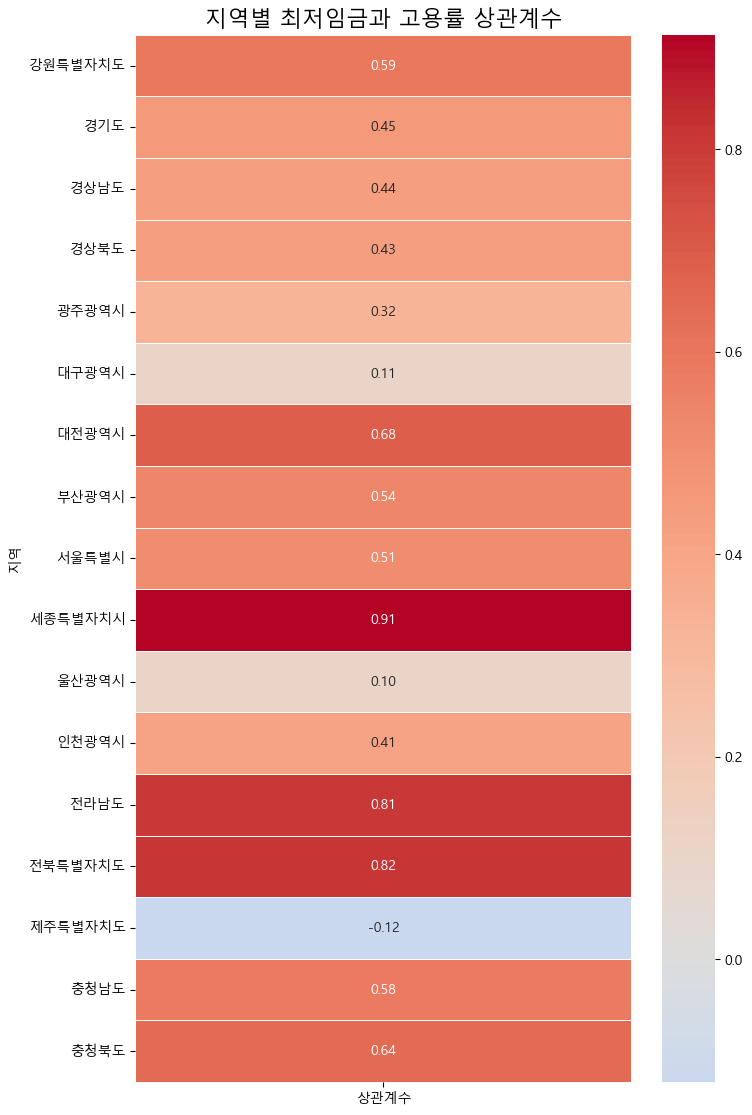

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

employee_rate['시점'] = employee_rate['시점'].astype(str) # 데이터 일관성
min_wage['시점'] = min_wage['시점'].astype(str) # 데이터 일관성

min_wage['최저임금'] = min_wage['최저임금'].astype(str) # 데이터 일관성

pivot_emp = employee_rate.pivot(index='시점', columns='행정구역', values='고용률') # 조인을 위해 테이블 행과열 처리

df_merged = pivot_emp.merge(min_wage.set_index('시점'), left_index=True, right_index=True) # 조인

regions = pivot_emp.columns.tolist() # 지역을 리스트에 담음
corr_list = []

for region in regions: # 각 지역별 상관계수를 구함 (최저임금을 통해)
    corr = df_merged[region].corr(df_merged['최저임금'])
    corr_list.append(corr)

corr_df = pd.DataFrame({'지역': regions, '상관계수': corr_list}).set_index('지역')

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(8, len(regions) * 0.8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5) # 히트맵 표시
plt.title('지역별 최저임금과 고용률 상관계수', fontsize=16)
plt.yticks(rotation=0)
plt.show()